<a href="https://colab.research.google.com/github/ycarrera01/Proyecto-Final-Modelos-Predictivos/blob/main/Trabajoenclases_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np


In [4]:
# Fijar semilla para reproducibilidad
np.random.seed(42)

# Crear un dataset sintético
n_samples = 200

# Variables
edad = np.random.randint(18, 65, size=n_samples)
salario = np.random.normal(30000, 8000, size=n_samples).astype(int)
nivel_educativo = np.random.choice(['Primaria', 'Secundaria', 'Universitaria', 'Postgrado'], size=n_samples, p=[0.2, 0.4, 0.3, 0.1])
estado_civil = np.random.choice(['Soltero', 'Casado', 'Divorciado'], size=n_samples, p=[0.5, 0.4, 0.1])
sector_trabajo = np.random.choice(['Salud', 'Educación', 'Tecnología', 'Construcción', 'Comercio'], size=n_samples)

# Variable objetivo: si la persona solicitó un préstamo
# Generamos un patrón: más probabilidad de solicitar préstamo si tiene salario bajo o edad joven
prob_prestamo = np.where((salario < 25000) | (edad < 30), 0.7, 0.3)
solicito_prestamo = np.random.binomial(1, prob_prestamo)

# Construir DataFrame
df = pd.DataFrame({
    'Edad': edad,
    'Salario': salario,
    'Nivel_Educativo': nivel_educativo,
    'Estado_Civil': estado_civil,
    'Sector_Trabajo': sector_trabajo,
    'Solicito_Prestamo': solicito_prestamo
})


In [11]:
import os

folder = "/mnt/data"
os.makedirs(folder, exist_ok=True)  # Crea la carpeta si no existe

csv_path = os.path.join(folder, "dataset_sintetico_prestamos.csv")
df.to_csv(csv_path, index=False)

print(f"Archivo guardado exitosamente en: {csv_path}")


Archivo guardado exitosamente en: /mnt/data/dataset_sintetico_prestamos.csv


In [12]:
from google.colab import files
files.download('/mnt/data/dataset_sintetico_prestamos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
df.head ()

,Edad,Salario,Nivel_Educativo,Estado_Civil,Sector_Trabajo,Solicito_Prestamo
0,56,29851,Postgrado,Soltero,Construcción,0
1,46,16611,Universitaria,Casado,Tecnología,1
2,32,21419,Secundaria,Soltero,Construcción,1
3,60,22059,Universitaria,Soltero,Construcción,1
4,25,30818,Universitaria,Soltero,Construcción,0


In [14]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Edad               200 non-null    int64 
 1   Salario            200 non-null    int64 
 2   Nivel_Educativo    200 non-null    object
 3   Estado_Civil       200 non-null    object
 4   Sector_Trabajo     200 non-null    object
 5   Solicito_Prestamo  200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [15]:
df.describe ()

,Edad,Salario,Solicito_Prestamo
count,200.000000,200.000000,200.000000
mean,41.570000,31095.930000,0.485000
std,13.715527,7753.972444,0.501029
min,18.000000,14040.000000,0.000000
25%,30.000000,25145.500000,0.000000
50%,42.000000,30690.000000,0.000000
75%,54.000000,36994.500000,1.000000
max,64.000000,51875.000000,1.000000


In [16]:
#Verificar si hay nulos
df.isnull().sum()

,0
Edad,0
Salario,0
Nivel_Educativo,0
Estado_Civil,0
Sector_Trabajo,0
Solicito_Prestamo,0


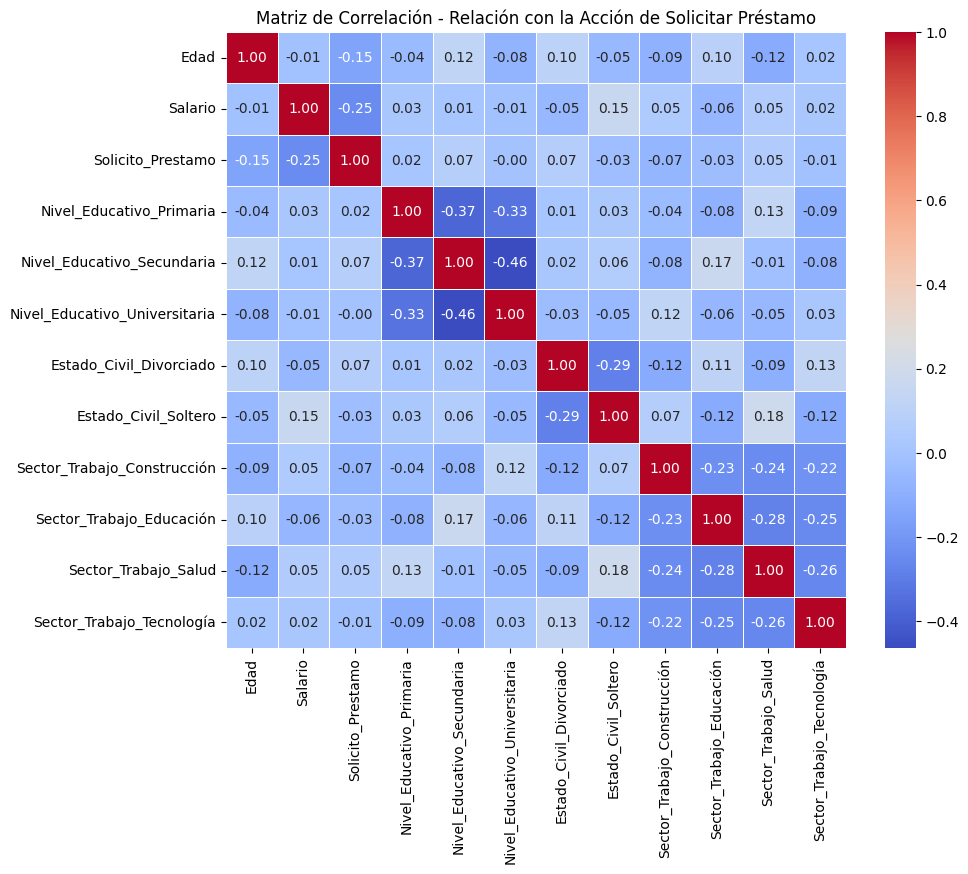

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir variables categóricas en variables numéricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el diagrama de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Relación con la Acción de Solicitar Préstamo")
plt.show()

Según lo observado en relación a la solicitu de préstamos la correlación de las variables estudiadas son débiles o moderada y negativas por lo que podría concluir que que niguno de esos factores individuales explicacompletamente la acción. Por lo que se hace útil complementar este análisis con modelos predictivos.


In [24]:
# Separar variables independientes y variable objetivo
X = df[['Edad', 'Salario','Nivel_Educativo','Estado_Civil','Sector_Trabajo']]
X_numeric = X.select_dtypes(include=['int64', 'float64'])
X_categorical = X.select_dtypes(include=['object'])
y = df['Solicito_Prestamo']


In [25]:
# Escalar los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)


In [26]:
# Convertir las columnas categóricas a variables dummy (binarias)
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

In [27]:
# Unir las columnas escaladas y las variables categóricas codificadas
X_scaled = pd.concat([pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns), X_categorical_encoded], axis=1)

In [28]:
# Ver las primeras filas del conjunto de datos escalados y codificados
X_scaled.head()

,Edad,Salario,Nivel_Educativo_Primaria,Nivel_Educativo_Secundaria,Nivel_Educativo_Universitaria,Estado_Civil_Divorciado,Estado_Civil_Soltero,Sector_Trabajo_Construcción,Sector_Trabajo_Educación,Sector_Trabajo_Salud,Sector_Trabajo_Tecnología
0,1.054732,-0.160957,False,False,False,False,True,True,False,False,False
1,0.323802,-1.872753,False,False,True,False,False,False,False,False,True
2,-0.699500,-1.251128,False,True,False,False,True,True,False,False,False
3,1.347105,-1.168383,False,False,True,False,True,True,False,False,False
4,-1.211152,-0.035934,False,False,True,False,True,True,False,False,False


In [29]:
# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)


In [31]:
# Entrenar modelo kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# Predicciones
y_pred = knn.predict(X_test)

In [33]:
# Evaluación del modelo KNN
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.475
Precision: 0.5263157894736842
Recall: 0.45454545454545453
F1 Score: 0.4878048780487805


In [38]:
#Modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Inicializar el clasificador Naive Bayes (GaussianNB)
nb = GaussianNB()

# Entrenar el modelo
nb.fit(X_train, y_train)


GaussianNB()

In [39]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = nb.predict(X_test)

In [36]:
# Evaluación del modelo Naive Bayes
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.625
Precision: 0.6521739130434783
Recall: 0.6818181818181818
F1 Score: 0.6666666666666666


In [37]:
#Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar y entrenar el modelo
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred = arbol.predict(X_test)

In [41]:
# Evaluación del modelo árbol de decisión
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.575
Precision: 0.5925925925925926
Recall: 0.7272727272727273
F1 Score: 0.6530612244897959


In [43]:
#Ramdon Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=80, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=42)

# Sección nueva

In [55]:
y_pred = RandomForestClassifier(X_test)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

TypeError: Expected sequence or array-like, got <class 'sklearn.ensemble._forest.RandomForestClassifier'>